This notebook walks you through on how to get a geojson shape plotted in a 2.5D view, with an overlayed satellite image on top. <br/>
For this, besides the notebook you will need this github project:<br/>
https://github.com/zhunor/threejs-dem-visualizer <br/>
It has to be cloned IN the same folder as this notebook. Afterwards install the project as follows: <br/>
From a command line: <br/>
cd threejs-dem-visualizer <br/>
yarn install <br/>
yarn build <br/>
After this is done go one with the steps in this notebook

In [1]:
import requests
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import LMIPy
%matplotlib inline

To get your desired shape, go to http://geojson.io, draw a shape and copy the coordinates starting from the first square bracket '[' until the last one ']' and replace them here in the 'coordinates' attribute. 

In [2]:
atts={'geojson': {'type': 'FeatureCollection',
  'features': [{'type': 'Feature',
    'properties': {},
    'geometry': {'type': 'Polygon',
     'coordinates': [
          [
            [
              -3.5976791381835933,
              40.86030420568381
            ],
            [
              -3.6038589477539062,
              40.89872234775293
            ],
            [
              -3.6694335937500004,
              40.886264852994955
            ],
            [
              -3.654670715332031,
              40.84654093547386
            ],
            [
              -3.5976791381835933,
              40.86030420568381
            ]
          ]
        ]
                }}]}}




{'attributes': {'dem': 'https://earthengine.googleapis.com/api/thumb?thumbid=9d49ff5715337c05bc2ff05e887dff73&token=7c00eaf311c192eb8086cb78205b13bf',
  'thumb_url': 'https://earthengine.googleapis.com/api/thumb?thumbid=121852cf4f3379148e9901da75d3ab6e&token=64432fbfaa94c80f0aff492a3db3fc1d',
  'tile_url': 'https://earthengine.googleapis.com/map/150a5c3feb39fb68ce6a6332bf03aef4/{z}/{x}/{y}?token=670f12945f870d4f70a864253b244bbc',
  'zonal_stats': None},
 'id': None,
 'type': 'composite_service'}

In [25]:
#g = LMIPy.Geometry(attributes=atts, server='http://localhost:9000')
g = LMIPy.Geometry(attributes=atts, server='https://staging-api.globalforestwatch.org')
#r = requests.get(f"http://localhost:9000/v1/composite-service?geostore={g.id}&get_dem=True")
r = requests.get(f"https://staging-api.globalforestwatch.org/v1/composite-service?geostore={g.id}&get_dem=True&date_range=2016-01-01, 2017-01-01")
r.json()

{'attributes': {'dem': 'https://earthengine.googleapis.com/api/thumb?thumbid=523303dca858821203e23482e16bf423&token=a5ff1f9e415cfbeb1d65042a06e0dec3',
  'thumb_url': 'https://earthengine.googleapis.com/api/thumb?thumbid=0495a4f217ecafedbddc2da593eb7cc3&token=0a6111356dc1d452924a505ebc47322f',
  'tile_url': 'https://earthengine.googleapis.com/map/79f1a0abebc654e1306654d00f0342b8/{z}/{x}/{y}?token=12d696dd20ec7fb2d19092b1c7d09d18',
  'zonal_stats': None},
 'id': None,
 'type': 'composite_service'}

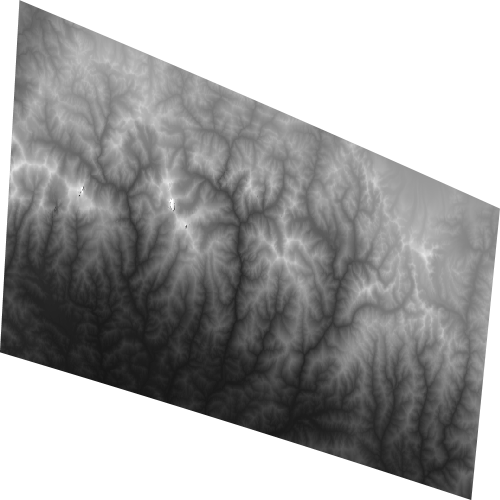

In [26]:
dem_url = r.json().get('attributes').get('dem')
surface_url = r.json().get('attributes').get('thumb_url')
dem = Image.open(requests.get(dem_url, stream=True).raw)
dem

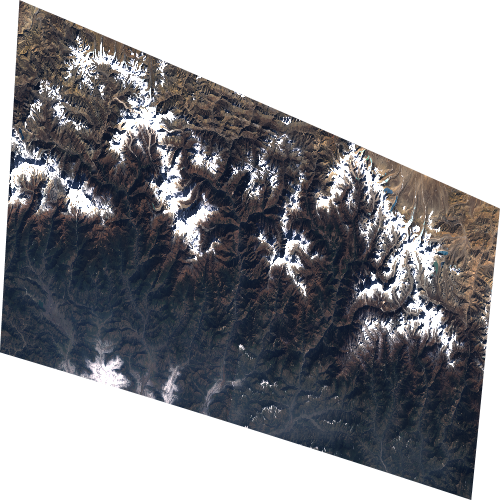

In [31]:
#%cd ../..
surface = Image.open(requests.get(surface_url, stream=True).raw)
surface.save("threejs-dem-visualizer/src/textures/surface.png")
surface

In [32]:
dem_array = np.array(dem)
d = dem_array[:,:,0]
d.min(), d.max(), np.unique(d), np.array(d).shape
#plt.imshow(d)


(0,
 255,
 array([  0,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
         34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
         47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
         60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
         73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
         86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
         99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
        112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
        125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,
        138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150,
        151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163,
        164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176,
        177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189,
        190, 191, 192, 193, 194, 195, 196

In [33]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib._png import read_png
from pylab import *
from matplotlib.cbook import get_sample_data

Text(0.5, 0, 'height above sea level (m)')

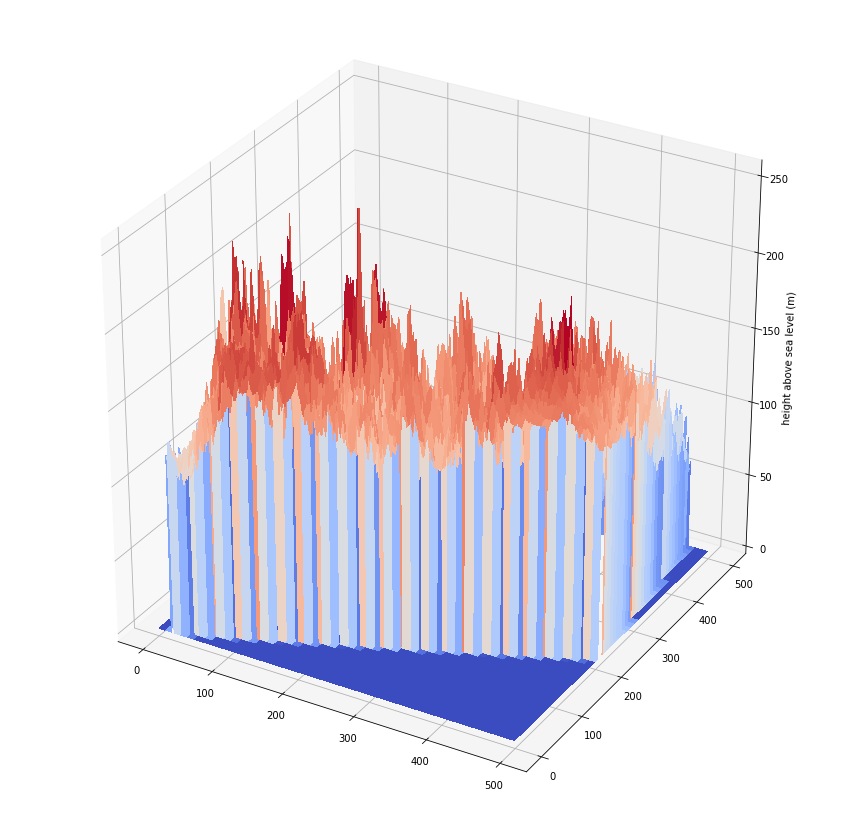

In [34]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')

X = np.arange(d.shape[0])
Y =  np.arange(d.shape[1])
X, Y = np.meshgrid(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, d, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.zaxis.set_label_text('height above sea level (m)')


In [ ]:
import rasterio
import rasterio.features
import rasterio.warp
import matplotlib.pyplot as plt

def open_tif(file_name):
    with rasterio.open(file_name) as dataset:

        # Read the dataset's valid data mask as a ndarray.
        mask = dataset.dataset_mask()

        # Extract feature shapes and values from the array.
        for geom, val in rasterio.features.shapes(
                mask, transform=dataset.transform):

            # Transform shapes from the dataset's own coordinate
            # reference system to CRS84 (EPSG:4326).
            geom = rasterio.warp.transform_geom(
                dataset.crs, 'EPSG:4326', geom, precision=6)

            # Print GeoJSON shapes to stdout.
            print(geom)
        return dataset
#dataset = open_tif('threejs-dem-visualizer/src/textures/agri-small-dem.tif')
#open_tif('new.tif')


Loading the 'agri-small-dem.tif' file just to have working sample profile which is replicated

In [50]:
agri = rasterio.open('threejs-dem-visualizer/src/textures/agri-small-dem.tif')   
agri_ar = agri.read(1)
# plt.imshow(agri_ar, cmap='pink')
# plt.show()
profile = agri.profile

Adjust the scaling factor to your liking, based on what looks right. A factor of one will leave shapes looking too flat, whereas 50 will be too much for some montaneous areas. 

In [57]:
scaling_factor = 7
d2 = np.dot(d, scaling_factor)
#d2 = d + 180
with rasterio.open('threejs-dem-visualizer/src/textures/testout.tif', 'w', **agri.profile) as dst:
    dst.write(d2.astype(profile['dtype']), 1)

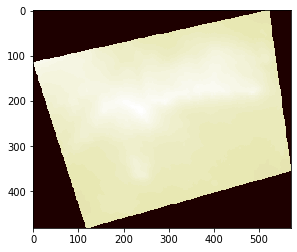

In [53]:
testout = rasterio.open('threejs-dem-visualizer/src/textures/testout.tif', **profile)
testout_ar = testout.read(1)
#testout.crs = agri.crs
#testout.crs = 'EPSG:4326'
#agri_ar.crs
plt.imshow(testout_ar, cmap='pink')
plt.show()

## One more thing before you run the app:
You have to go in the three-js-dem-visualizer/src/js folder, open the index.js file and comment out these two lines: <br/>
//import * as terrain from "../textures/agri-small-dem.tif"; <br/>
//import * as mountainImage from "../textures/agri-small-autumn.jpg"; <br/> 
### and copy the following 2 lines next
import * as terrain from "../textures/testout.tif"; <br/> 
import * as mountainImage from "../textures/surface.png"; <br/>
Now the next line will run the app

In [ ]:
#%cd threejs-dem-visualizer/src/ 
!yarn --cwd threejs-dem-visualizer/src/ dev

yarn run v1.13.0
$ webpack-dev-server --config webpack.config.js --mode development --open
clean-webpack-plugin: /Users/nrigheriu/vizzuality/tasks/thesis_data_sci/threejs-dem-visualizer/build has been removed.
ℹ ｢wds｣: Project is running at http://localhost:8080/
ℹ ｢wds｣: webpack output is served from /
ℹ ｢wds｣: Content not from webpack is served from /Users/nrigheriu/vizzuality/tasks/thesis_data_sci/threejs-dem-visualizer/build
ℹ ｢wdm｣: wait until bundle finished: /
⚠ ｢wdm｣: Hash: 61a06d7072a9fe2e6b65
Version: webpack 4.28.3
Time: 7048ms
Built at: 2019-06-28 17:49:24
                               Asset       Size  Chunks                    Chunk Names
47135151d57e471f0dae5637ad4adb78.png    127 KiB          [emitted]         
a021650add958e5a3a6df3d58ea39299.tif   1.05 MiB          [emitted]  [big]  
             ef32a768aa54194e387f.js   3.21 MiB    home  [emitted]  [big]  home
         ef32a768aa54194e387f.js.map   3.87 MiB    home  [emitted]         home
                          